In [8]:
import random
import json
import urllib.request
import matplotlib.pyplot as plt

In [34]:
gameid = 2020020001
gamedetail = []
gamesummary = []
shotdetails = []
starturl = 'https://statsapi.web.nhl.com/api/v1/game/'
endurl = '/feed/live.json'


In [35]:
while gameid < 2020020055:
    pullurl = starturl + str(gameid) + endurl
    with urllib.request.urlopen(pullurl) as url:
        obj = json.loads(url.read().decode())
    allPlays = obj["liveData"]["plays"]['allPlays']
    if (obj['gameData']['teams']['away']['name'] == 'Los Angeles Kings' or obj['gameData']['teams']['home']['name'] == 'Los Angeles Kings'):
        for play in allPlays:
            if ('Shot' in play['result'].values() or 'Goal' in play['result'].values() or 'Missed Shot' in play['result'].values() or 'Blocked Shot' in play['result'].values()) and play['about']['period'] != 5:
                eventid = play['about']['eventIdx']
                eventdetail = play['result']['event']
                period = play['about']['period']
                timeremaining = play['about']['periodTimeRemaining']
                x = ''
                y = ''
                if (play['about']['period'] == 3 or play['about']['period'] == 1):
                    if play['coordinates']:
                        x = play['coordinates']['x']
                        y = play['coordinates']['y']
                if (play['about']['period'] == 2 or play['about']['period'] == 4):
                    if play['coordinates']:
                        x = play['coordinates']['x']*-1
                        y = play['coordinates']['y']*-1
        #         print(x)
        #         print(y)
                data = {
                    'gameid': gameid,
                    'eventid': eventid,
                    'eventdetail': eventdetail,
                    'period': period,
                    'timeremaining': timeremaining,
                    'x': x,
                    'y': y,
        #           'name': team_name,
        #           'period': period,
        #           'description': description,
                  }
                gamedetail.append(data)
                gamesummary.append(play)
                print(gamedetail)
    gameid = gameid + 1
    #print(gamedetail)

[{'gameid': 2020020016, 'eventid': 5, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '18:44', 'x': -79.0, 'y': 1.0}]
[{'gameid': 2020020016, 'eventid': 5, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '18:44', 'x': -79.0, 'y': 1.0}, {'gameid': 2020020016, 'eventid': 11, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '17:30', 'x': -78.0, 'y': 9.0}]
[{'gameid': 2020020016, 'eventid': 5, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '18:44', 'x': -79.0, 'y': 1.0}, {'gameid': 2020020016, 'eventid': 11, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '17:30', 'x': -78.0, 'y': 9.0}, {'gameid': 2020020016, 'eventid': 13, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '16:08', 'x': 55.0, 'y': -9.0}]
[{'gameid': 2020020016, 'eventid': 5, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '18:44', 'x': -79.0, 'y': 1.0}, {'gameid': 2020020016, 'eventid': 11, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '17:30', 'x': -7

[{'gameid': 2020020016, 'eventid': 5, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '18:44', 'x': -79.0, 'y': 1.0}, {'gameid': 2020020016, 'eventid': 11, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '17:30', 'x': -78.0, 'y': 9.0}, {'gameid': 2020020016, 'eventid': 13, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '16:08', 'x': 55.0, 'y': -9.0}, {'gameid': 2020020016, 'eventid': 22, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '12:55', 'x': 78.0, 'y': -7.0}, {'gameid': 2020020016, 'eventid': 23, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '12:38', 'x': -46.0, 'y': -17.0}, {'gameid': 2020020016, 'eventid': 28, 'eventdetail': 'Shot', 'period': 1, 'timeremaining': '11:23', 'x': -30.0, 'y': 30.0}, {'gameid': 2020020016, 'eventid': 37, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '10:32', 'x': -60.0, 'y': -12.0}, {'gameid': 2020020016, 'eventid': 40, 'eventdetail': 'Blocked Shot', 'period': 1, 'timeremaining': '08

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
import pandas as pd

In [37]:
# from IPython.display import display
gamedetail_df = pd.DataFrame(gamedetail)
# pd.set_option('display.max_columns', None)
# display(gamedetail_df)

In [38]:
gamedetail_df.eventdetail.unique()

array(['Shot', 'Blocked Shot', 'Missed Shot', 'Goal'], dtype=object)

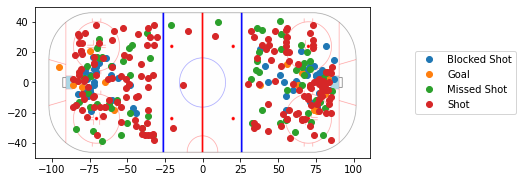

In [39]:
# gamedetail_df_clean = gamedetail_df[["eventdetail","x","y"]]
# nan_value = float("NaN")
# gamedetail_df_clean.replace("", nan_value, inplace=True)
# gamedetail_df_clean.dropna(subset=['x'],inplace=True)
im = plt.imread("full-rink2-e1415240935630-1024x429.png")
implot = plt.imshow(im,extent=[-111, 111, -50, 50])
groups = gamedetail_df.groupby("eventdetail")

for name, group in groups:
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend(loc='right',bbox_to_anchor=(1.45, 0.5))

In [ ]:
unique = []
for key in gamesummary:
    for key0 in key.keys():
        if key0 not in unique:
            unique.append(key0)
print(unique)

In [ ]:
gamesummary_df

In [ ]:
shotdetail_df.head(100)

In [ ]:
play['result'].keys()

In [ ]:
# gameid = 2020020001
# shotdetails = []
# starturl = 'https://statsapi.web.nhl.com/api/v1/game/'
# endurl = '/feed/live.json'


# while gameid < 2020020055: #2019021272:
#     pullurl = starturl + str(gameid) + endurl
#     with urllib.request.urlopen(pullurl) as url:
#         obj = json.loads(url.read().decode())
#         # print(obj)
#         allPlays = obj["liveData"]["plays"]['allPlays']
#         home_team = obj["gameData"]["teams"]["home"]["name"]
#         away_team = obj["gameData"]["teams"]["away"]["name"]
#         for play in allPlays:
#             if ('Shot' in play['result'].values() or 'Goal' in play['result'].values() or 'Missed Shot' in play['result'].values() or 'Blocked Shot' in play['result'].values()) and play['about']['period'] != 5:
#                 eventdetail = play['result']['event']
#                 eventid = play['about']['eventId']
#                 eventidx = play['about']['eventIdx']
#                 period = play['about']['period']
#                 team_name = play['team']['name']
#                 x = play['coordinates']['x']
#                 y = play['coordinates']['y']
#                 eventdetailid = play['result']['eventTypeId']
#                 eventdetaildescription = play['result']['description']
#                 if 'Shot' in play['result'].values() or 'Goal' in play['result'].values() or 'Missed Shot' in play['result'].values():
#                     shooter_name = play['players'][0]['player']['fullName']
#                 elif 'Blocked Shot' in play['result'].values():
#                     shooter_name = play['players'][1]['player']['fullName']
#                 else:
#                     shooter_name = ''
#                 stopper_name = ''
#                 if 'Shot' in play['result'].values() or 'Goal' in play['result'].values():
#                     try:
#                       stopper_name = play['players'][1]['player']['fullName']
#                     except: "notavailable"
#                 elif 'Blocked Shot' in play['result'].values():
#                     stopper_name = play['players'][0]['player']['fullName']
#                 secondaryType = ''
#                 if 'secondaryType' in play['result'].keys():
#                     secondaryType = play['result']['secondaryType']
#                 shot_detail = {
#                   'gameid': gameid,
#                   'eventid': eventid,
#                   'eventidx': eventidx,
#                   'x': x,
#                   'y': y,
#                   'teamname': team_name,
#                   'period': period,
#                   #'eventdetail' : eventdetail,
#                   'eventdetailid' : eventdetailid,
#                   'eventdetaildescription' : eventdetaildescription,
#                   'secondaryType' : secondaryType,
#                   'shooter' : shooter_name,
#                   'saveName' : stopper_name
#                 }
#                 shotdetails.append(shot_detail)
#                 print(shot_detail)

#     gameid += 1
#     #time.sleep(1)

In [ ]:


while gameid < 2020020055:
    pullurl = starturl + str(gameid) + endurl
    with urllib.request.urlopen(pullurl) as url:
        obj = json.loads(url.read().decode())
        # print(obj)
    allPlays = obj["liveData"]["plays"]['allPlays']
    teamStats = obj["liveData"]["boxscore"]["teams"]
    game_date = obj["gameData"]["datetime"]["dateTime"]
    home_team = obj["gameData"]["teams"]["home"]["name"]
    away_team = obj["gameData"]["teams"]["away"]["name"]
    game_date = game_date.split("T")[0]


    for play in allPlays:
        event = play['result']['event']
        eventid = play['about']['eventId']
        eventidx = play['about']['eventIdx']
        period = play['about']['period']
        description = play['result']['description']
        eventtype = play['result']['eventTypeId']
        x = ''
        y = ''
        team_name = ''
        if 'team' in play.keys():
            if bool(play['team']):
                team_name = play['team']['name']
            if bool(play['coordinates']):
                x = play['coordinates']['x']
                y = play['coordinates']['y']

        data = {
          'gameid': gameid,
          'eventid': eventid,
          'eventtype': eventtype,
          'eventidx': eventidx,
          'event': event,
          'x': x,
          'y': y,
          'name': team_name,
          'period': period,
          'description': description,
          }
        gamedetail.append(data)
        if 'Shot' in play['result'].values() or 'Goal' in play['result'].values() or 'Missed Shot' in play['result'].values():
            eventdetail = play['result']['event']
            eventdetailid = play['result']['eventTypeId']
            eventdetaildescription = play['result']['description']
            shooter_name = play['players'][0]['player']['fullName']
            stopper_name = ''
            if 'Shot' in play['result'].values() or 'Goal' in play['result'].values():
                stopper_name = play['players'][1]['player']['fullName']
            secondaryType = ''
            if 'secondaryType' in play['result'].keys():
                secondaryType = play['result']['secondaryType']
            shot_detail = {
                'gameid': gameid,
                'eventid': eventid,
                'eventidx': eventidx,
                'x': x,
                'y': y,
                'period': period,
                'eventdetail' : eventdetail,
                'eventdetailid' : eventdetailid,
                'eventdetaildescription' : eventdetaildescription,
                'secondaryType' : secondaryType,
                'shooter' : shooter_name,
                'saveName' : stopper_name
            }
            shotdetails.append(shot_detail)
            #print(data)



    home_goals = teamStats['home']['teamStats']['teamSkaterStats']['goals']
    home_pim = teamStats['home']['teamStats']['teamSkaterStats']['pim']
    home_shots = teamStats['home']['teamStats']['teamSkaterStats']['shots']
    home_PPPercentage = teamStats['home']['teamStats']['teamSkaterStats']['powerPlayPercentage']
    home_PPGoals = teamStats['home']['teamStats']['teamSkaterStats']['powerPlayGoals']
    home_PPOpportunities = teamStats['home']['teamStats']['teamSkaterStats']['powerPlayOpportunities']
    home_FOWinPercentage = teamStats['home']['teamStats']['teamSkaterStats']['faceOffWinPercentage']
    home_blocked = teamStats['home']['teamStats']['teamSkaterStats']['blocked']
    home_takeaways = teamStats['home']['teamStats']['teamSkaterStats']['takeaways']
    home_giveaways = teamStats['home']['teamStats']['teamSkaterStats']['giveaways']
    home_hits = teamStats['home']['teamStats']['teamSkaterStats']['hits']
    away_goals = teamStats['away']['teamStats']['teamSkaterStats']['goals']
    away_pim = teamStats['away']['teamStats']['teamSkaterStats']['pim']
    away_shots = teamStats['away']['teamStats']['teamSkaterStats']['shots']
    away_PPPercentage = teamStats['away']['teamStats']['teamSkaterStats']['powerPlayPercentage']
    away_PPGoals = teamStats['away']['teamStats']['teamSkaterStats']['powerPlayGoals']
    away_PPOpportunities = teamStats['away']['teamStats']['teamSkaterStats']['powerPlayOpportunities']
    away_FOWinPercentage = teamStats['away']['teamStats']['teamSkaterStats']['faceOffWinPercentage']
    away_blocked = teamStats['away']['teamStats']['teamSkaterStats']['blocked']
    away_takeaways = teamStats['away']['teamStats']['teamSkaterStats']['takeaways']
    away_giveaways = teamStats['away']['teamStats']['teamSkaterStats']['giveaways']
    away_hits = teamStats['away']['teamStats']['teamSkaterStats']['hits']
    summarygame = {
        'gameid': gameid,
        'game_date': game_date,
        'home_team': home_team,
        'away_team': away_team,
        'home_goals': home_goals,
        'away_goals': away_goals,
        'home_shots': home_shots,
        'away_shots': away_shots,
        'home_blocked': home_blocked,
        'away_blocked': away_blocked,
        'home_takeaways': home_takeaways,
        'away_takeaways': away_takeaways,
        'home_giveaways': home_giveaways,
        'away_giveaways': away_giveaways,
        'home_penalties': home_pim,
        'away_penalties': away_pim,
        'home_PPPercentage': home_PPPercentage,
        'away_PPPercentage': away_PPPercentage,
        'home_PPGoals': home_PPGoals,
        'away_PPGoals': away_PPGoals,
        'home_PPOpportunities': home_PPOpportunities,
        'away_PPOpportunities': away_PPOpportunities,
        'home_FOWinPercentage': home_FOWinPercentage,
        'away_FOWinPercentage': away_FOWinPercentage,
        'home_hits': home_hits,
        'away_hits': away_hits
        }
    gamesummary.append(summarygame)


      


    for data in gamedetail:
        print(data)
        #print("-------------------------------")
    gameid += 1
    #time.sleep(10)